In [205]:
import pandas as pd
import numpy as np

This is datasets from :

https://www.kaggle.com/datasets/kartik2112/fraud-detection

In [206]:
df_raw = pd.read_csv("fraudTrain.csv", parse_dates= ['trans_date_trans_time','dob'], index_col= 0)

# Prepare Data

In [207]:
df_raw.head().T

,0,1,2,3,4
trans_date_trans_time,2019-01-01 00:00:18,2019-01-01 00:00:44,2019-01-01 00:00:51,2019-01-01 00:01:16,2019-01-01 00:03:06
cc_num,2703186189652095,630423337322,38859492057661,3534093764340240,375534208663984
merchant,"fraud_Rippin, Kub and Mann","fraud_Heller, Gutmann and Zieme",fraud_Lind-Buckridge,"fraud_Kutch, Hermiston and Farrell",fraud_Keeling-Crist
category,misc_net,grocery_pos,entertainment,gas_transport,misc_pos
amt,4.97,107.23,220.11,45.0,41.96
first,Jennifer,Stephanie,Edward,Jeremy,Tyler
last,Banks,Gill,Sanchez,White,Garcia
gender,F,F,M,M,M
street,561 Perry Cove,43039 Riley Greens Suite 393,594 White Dale Suite 530,9443 Cynthia Court Apt. 038,408 Bradley Rest
city,Moravian Falls,Orient,Malad City,Boulder,Doe Hill


In [208]:
df_raw.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

Select used column :

['trans_date_trans_time', 'amt','gender', 'city_pop', 'dob', 'is_fraud']

Drop name of customer and trans_num

and I will feature Engineering 3 column age of user, hour_of_trans, day_of_trans

In [339]:
def preprocessing(df):
    # df_new = df[['trans_date_trans_time', 'amt','gender', 'city_pop', 'job', 'dob', 'is_fraud']].copy()
    df_new = df.copy()
    df_new.columns = df_new.columns.str.lower().str.replace(' ', '_')

    categorical_columns = list(df_new.dtypes[df_new.dtypes == 'object'].index)

    for c in categorical_columns:
        df_new[c] = df_new[c].str.lower().str.replace(' ', '_')

    max_date = max(df_new['trans_date_trans_time'])

    df_new['hour_of_trans'] = df_new['trans_date_trans_time'].dt.hour
    df_new['day_of_trans'] = df_new['trans_date_trans_time'].dt.weekday
    df_new['age'] = round((max_date - df_new['dob']) /  pd.Timedelta('365 days')).astype(int)
    
    df_new = df_new[['category', 'amt','gender', 'city_pop', 'hour_of_trans', 'day_of_trans', 'age', 'is_fraud']]
    return df_new

In [340]:
df = preprocessing(df_raw)

In [341]:
df.head().T

,0,1,2,3,4
category,misc_net,grocery_pos,entertainment,gas_transport,misc_pos
amt,4.97,107.23,220.11,45.0,41.96
gender,f,f,m,m,m
city_pop,3495,149,4154,1939,99
hour_of_trans,0,0,0,0,0
day_of_trans,1,1,1,1,1
age,32,42,58,53,34
is_fraud,0,0,0,0,0


In [342]:
df.tail().T

,1296670,1296671,1296672,1296673,1296674
category,entertainment,food_dining,food_dining,food_dining,food_dining
amt,15.56,51.7,105.93,74.9,4.3
gender,m,m,m,m,m
city_pop,258,100,899,1126,218
hour_of_trans,12,12,12,12,12
day_of_trans,6,6,6,6,6
age,59,41,53,40,25
is_fraud,0,0,0,0,0


In [343]:
df.dtypes

category          object
amt              float64
gender            object
city_pop           int64
hour_of_trans      int64
day_of_trans       int64
age                int32
is_fraud           int64
dtype: object

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   category       1296675 non-null  object 
 1   amt            1296675 non-null  float64
 2   gender         1296675 non-null  object 
 3   city_pop       1296675 non-null  int64  
 4   hour_of_trans  1296675 non-null  int64  
 5   day_of_trans   1296675 non-null  int64  
 6   age            1296675 non-null  int32  
 7   is_fraud       1296675 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 84.1+ MB


In [345]:
df.describe().round()

,amt,city_pop,hour_of_trans,day_of_trans,age,is_fraud
count,1296675.0,1296675.0,1296675.0,1296675.0,1296675.0,1296675.0
mean,70.0,88824.0,13.0,3.0,47.0,0.0
std,160.0,301956.0,7.0,2.0,17.0,0.0
min,1.0,23.0,0.0,0.0,15.0,0.0
25%,10.0,743.0,7.0,1.0,33.0,0.0
50%,48.0,2456.0,14.0,3.0,45.0,0.0
75%,83.0,20328.0,19.0,5.0,58.0,0.0
max,28949.0,2906700.0,23.0,6.0,96.0,1.0


Check target values

It have only 2 unique values 

- 1 : stand for fraud

- 0 : non-fraud

# Setting up the validation framework 

In [346]:
from sklearn.model_selection import train_test_split

In [501]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [495]:
len(df_train), len(df_val), len(df_test)

(778005, 259335, 259335)

In [502]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [497]:
y_train = df_train.is_fraud.values
y_val = df_val.is_fraud.values
y_test = df_test.is_fraud.values

del df_train['is_fraud']
del df_val['is_fraud']
del df_test['is_fraud']

In [431]:
len(y_train) , len(y_val)

(778005, 259335)

# EDA

- Check missing values
- Look at the target variable (is_fraud)
- Look at numerical and categorical variables

## Check missing values

In [351]:
df_full_train = df_full_train.reset_index(drop=True)

In [352]:
df_full_train.isnull().sum()

category         0
amt              0
gender           0
city_pop         0
hour_of_trans    0
day_of_trans     0
age              0
is_fraud         0
dtype: int64

## target variable

In [353]:
df_full_train.is_fraud.value_counts()

0    1031264
1       6076
Name: is_fraud, dtype: int64

In [354]:
df_full_train.is_fraud.value_counts(normalize=True)

0    0.994143
1    0.005857
Name: is_fraud, dtype: float64

In [355]:
global_is_fraud_rate = df_full_train.is_fraud.mean()
round(global_is_fraud_rate,2)

0.01

target variable is imbalanced

## categorical variables

In [356]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [357]:
list(df_full_train.dtypes[df_full_train.dtypes == 'object'].index)

['category', 'gender']

--------------------Column : category------------------------------
global_is_fraud_rate : 0.00585728883490466
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
entertainment  :  0.002376905508046954
diff : 0.003480383326857706  :  less likely to is_fraud
risk : 0.40580302167831256  :  less likely to is_fraud
----------------
food_dining  :  0.0016250836440110889
diff : 0.004232205190893571  :  less likely to is_fraud
risk : 0.27744639026966145  :  less likely to is_fraud
----------------
gas_transport  :  0.004887817470862913
diff : 0.0009694713640417468  :  less likely to is_fraud
risk : 0.8344846239672373  :  less likely to is_fraud
----------------
grocery_net  :  0.002978735140800397
diff : 0.0028785536941042626  :  less likely to is_fraud
risk : 0.5085518615796386  :  less likely to is_fraud
----------------
grocery_pos  :  0.014274313307539222
diff : -0.008417024472634562  :  less likely to is_fraud
risk : 2.437017143917501  :  more likely to 

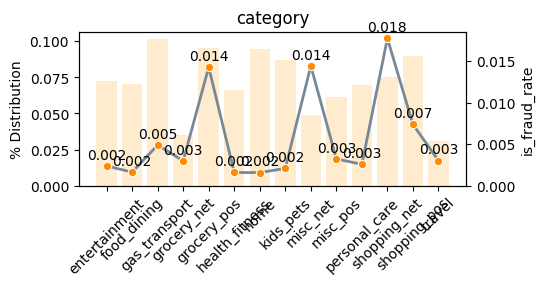

--------------------Column : gender------------------------------
global_is_fraud_rate : 0.00585728883490466
----------------
diff_threshold : <  -0.02 | risk_threshold : >  1.1
----------------
f  :  0.005339816935652829
diff : 0.0005174718992518304  :  less likely to is_fraud
risk : 0.9116533410187798  :  less likely to is_fraud
----------------
m  :  0.0064835312340867975
diff : -0.0006262423991821378  :  less likely to is_fraud
risk : 1.1069167693165898  :  more likely to is_fraud


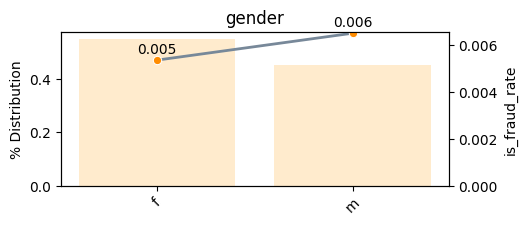

In [358]:
diff_threshold = -0.02
risk_threshold = 1.1
for c in list(df_full_train.dtypes[df_full_train.dtypes == 'object'].index):
    print(f"--------------------Column : {c}------------------------------")
    print("global_is_fraud_rate :" , global_is_fraud_rate)
    print("----------------")
    data = df_full_train[[c,'is_fraud']].copy()

    df_group = df_full_train[[c,'is_fraud']].groupby(c).agg(is_fraud_rate = ('is_fraud','mean'),
                                                        dist = (c,lambda x : len(x)/len(df_full_train)))

    print("diff_threshold : < ", diff_threshold, "|" , "risk_threshold : > ", risk_threshold)                                                    
    for i , row in df_group.iterrows():
        diff = "more likely to is_fraud" if global_is_fraud_rate - row['is_fraud_rate'] < diff_threshold else "less likely to is_fraud"
        risk = "more likely to is_fraud" if row['is_fraud_rate']/global_is_fraud_rate > risk_threshold else "less likely to is_fraud"
        print("----------------")
        print(i, " : ", row['is_fraud_rate'])
        print("diff :" , global_is_fraud_rate - row['is_fraud_rate'] , " : " , diff)
        print("risk :" , row['is_fraud_rate']/global_is_fraud_rate , " : " , risk)
        
    df_group = df_group.reset_index()
    x = df_group[c]

    y1 = df_group['dist']
    y2 = df_group['is_fraud_rate']

    fig, ax1  = plt.subplots(figsize=(5,2))
    
    plt.tick_params(axis='x', rotation = 45)

    plt.title(c)
    ax1.bar(x,y1, data = df_group, color='navajowhite', alpha=.6)
    ax1.set_ylabel('% Distribution')

    ax2 = ax1.twinx()
    ax2 = sns.lineplot(x = x,y =  y2, data = df_group, marker='o',\
                    markerfacecolor='darkorange', markersize=6, color='lightslategray', 
                    linewidth=2)
    ax2.set_ylim(bottom=0)
    
    for x,y in zip(x,y2):
            label = "{:.3f}".format(y)
            plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,5), ha='center', color='black') 
    plt.show()

## Numerical variables
Correlation matrix

In [359]:
df_corr = df[df.select_dtypes(include=np.number).columns].corr()
df_corr

,amt,city_pop,hour_of_trans,day_of_trans,age,is_fraud
amt,1.000000,0.005818,-0.022811,-0.001001,-0.009769,0.219404
city_pop,0.005818,1.000000,0.020381,0.002439,-0.091379,0.002136
hour_of_trans,-0.022811,0.020381,1.000000,0.000219,-0.172862,0.013799
day_of_trans,-0.001001,0.002439,0.000219,1.000000,-0.011548,0.001739
age,-0.009769,-0.091379,-0.172862,-0.011548,1.000000,0.012343
is_fraud,0.219404,0.002136,0.013799,0.001739,0.012343,1.000000


In [360]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

# Model Training

- DecisionTreeClassifier
- RandomForestClassifier
- XGBoost

preprocessing

In [ ]:
train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')

In [408]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [409]:
X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)
X = np.concatenate((X_train, X_val))

In [416]:
len(X)

1037340

In [407]:
dv.get_feature_names_out()

array(['age', 'amt', 'category=entertainment', 'category=food_dining',
       'category=gas_transport', 'category=grocery_net',
       'category=grocery_pos', 'category=health_fitness', 'category=home',
       'category=kids_pets', 'category=misc_net', 'category=misc_pos',
       'category=personal_care', 'category=shopping_net',
       'category=shopping_pos', 'category=travel', 'city_pop',
       'day_of_trans', 'gender=f', 'gender=m', 'hour_of_trans'],
      dtype=object)

In [434]:
len(y)

1037340

In [433]:
y = np.append(y_train,y_val,axis=0)

Training

In [373]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve

In [374]:
dt_clf = DecisionTreeClassifier()
log_clf = LogisticRegression()
lgbm_clf = LGBMClassifier()

In [375]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = dict()
for clf in [lgbm_clf, dt_clf, log_clf]:
    clf_list = []
    for train_idxs, val_idxs in kfold.split(X):
        X_train, X_test = X[train_idxs], X[val_idxs]
        y_train, y_test = y[train_idxs], y[val_idxs]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        clf_list.append(roc_auc_score(y_test, y_pred))
    scores[clf.__class__.__name__] = clf_list

In [376]:
for key in scores.keys():
    print(f'{key}' + ' ' + f'{np.mean(scores[key]):.3f} +- {np.std(scores[key]):.3f}')

LGBMClassifier 0.856 +- 0.039
DecisionTreeClassifier 0.913 +- 0.005
LogisticRegression 0.500 +- 0.000


Hyperparameter Tuning

In [ ]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
min_sample_leaf = [1, 5, 10, 15, 20, 500, 100, 200]

scores = list()

for depth in depths:
    for sample in min_sample_leaf:
        dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sample, max_features='auto', random_state=42)
        dt_clf.fit(X_train, y_train)
        
        y_pred = dt_clf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, sample, auc))

In [395]:
df_score = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
dt_scores_pivot = df_score.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
dt_scores_pivot

auc                                                    \
max_depth              NaN      1.0       2.0       3.0       4.0       5.0    
min_samples_leaf                                                               
1                 0.971735  0.695632  0.710681  0.787031  0.795651  0.830793   
5                 0.980866  0.695632  0.710681  0.787031  0.795651  0.831081   
10                0.985702  0.695632  0.710681  0.787031  0.795651  0.831081   
15                0.984993  0.695632  0.710681  0.787031  0.795651  0.831081   
20                0.986745  0.695632  0.710681  0.787031  0.795610  0.831050   
100               0.989046  0.695632  0.710681  0.787031  0.795537  0.815563   
200               0.984583  0.695632  0.710681  0.787031  0.795437  0.815469   
500               0.979720  0.695632  0.710681  0.787031  0.795097  0.816201   

                                                          
max_depth             6.0       10.0      15.0      20.0  
min_samples_leaf                                          
1                 0.907565  0.972845  0.981435  0.976126  
5                 0.902074  0.971210  0.985385  0.984046  
10                0.902068  0.971318  0.983987  0.983628  
15                0.902036  0.967979  0.988899  0.985134  
20                0.908322  0.964311  0.980296  0.987217  
100               0.904786  0.966779  0.985009  0.989452  
200               0.904881  0.973726  0.984795  0.983669  
500               0.899238  0.966445  0.983956  0.974416

# On test data

In [520]:
model = DecisionTreeClassifier(max_depth=15, min_samples_leaf=15, max_features='sqrt', random_state=42)

In [521]:
model.fit(X,y)

DecisionTreeClassifier(max_depth=15, max_features='sqrt', min_samples_leaf=15,
                       random_state=42)

In [522]:
y_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
auc

0.9575099249832194

# Test Prediction

In [483]:
import json

In [526]:
df_test[df_test['is_fraud'] == 0]

,category,amt,gender,city_pop,hour_of_trans,day_of_trans,age,is_fraud
0,grocery_net,20.00,f,1190,8,0,72,0
1,home,284.88,f,761,19,4,77,0
2,shopping_net,5.07,f,79613,21,6,42,0
3,food_dining,45.38,f,165556,17,4,23,0
4,health_fitness,27.52,m,67858,23,5,25,0
...,...,...,...,...,...,...,...,...
259330,kids_pets,49.92,m,168,22,1,42,0
259331,misc_pos,141.44,f,107941,8,6,29,0
259332,shopping_net,356.74,f,1186,20,4,34,0
259333,kids_pets,12.22,f,1051,12,0,44,0


In [527]:
sample_transaction = df_test.iloc[259331].to_dict()
print(json.dumps(sample_transaction, indent=2))

{
  "category": "misc_pos",
  "amt": 141.44,
  "gender": "f",
  "city_pop": 107941,
  "hour_of_trans": 8,
  "day_of_trans": 6,
  "age": 29,
  "is_fraud": 0
}


In [518]:
sample_dict = dv.transform(sample_transaction)
sample_dict

array([[ 50. , 876.9,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,   0. ,
          0. ,   0. ,   0. ,   0. ,   1. ,   0. ,   0. , 805. ,   1. ,
          0. ,   1. ,  22. ]])

In [525]:
model.predict_proba(sample_dict)[0,1]

0.7777777777777778